
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of stocks from the S&P 600.  Construct portfolios from the 600 stocks in the S&P 600 small cap index and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['sp600-galaxy']
risk_free_rate = 0
annual_returns = '3 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,AAP,"Advance Auto Parts, Inc.",US Stocks:Consumer Discretionary,-96.45,-46.68,-41.89,-41.22,-21.54,76.86,64.06,48.70,-41.22,-2007.41
1,AAT,American Assets Trust,US Stocks:Real Estate,-49.35,-58.34,11.73,-9.61,-8.62,28.57,22.99,30.28,-9.61,-290.99
2,ABCB,Ameris Bancorp,US Stocks:Financials,-11.00,-35.78,43.86,11.56,12.91,24.38,12.86,37.72,11.56,0.31
3,ABG,Asbury Automotive Group,US Stocks:Consumer Discretionary,-23.00,2.39,26.60,13.58,22.58,29.67,19.99,37.46,13.58,0.36
4,ABM,"ABM Industries, Inc.",US Stocks:Industrials,34.64,-17.82,34.87,10.25,10.89,14.25,6.08,25.23,10.25,0.41
5,ABR,Arbor Realty Trust,US Stocks:Financials,-62.13,-51.14,5.38,-0.03,8.53,51.02,45.96,41.53,-0.03,-1.25
6,ACA,"Arcosa, Inc.",US Stocks:Industrials,-86.40,-67.99,2.42,22.48,15.77,34.53,30.70,30.33,22.48,0.74
7,ACAD,Acadia Pharmaceuticals,US Stocks:Healthcare,117.65,97.19,-25.64,-7.41,-13.58,35.71,16.76,46.94,-7.41,-347.83
8,ACIW,ACI Worldwide,US Stocks:Technology,120.64,-6.42,83.70,20.64,13.21,37.67,11.92,37.22,20.64,0.55
9,ACLS,"Axcelis Technologies, Inc.",US Stocks:Technology,-93.27,-74.98,-50.07,-4.97,18.69,62.62,48.61,57.46,-4.97,-285.58


In [6]:
# Rank
rank = bb.rank(df, rank_by='Sharpe Ratio', group_by='Asset Subclass', num_per_group=1)
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered = rank_filtered.head(20)
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
329,MDU,"MDU Resources Group, Inc.",US Stocks:Utilities,-16.43,-44.58,50.08,24.21,12.70,29.08,20.48,23.99,24.21,1.01
267,IDCC,"InterDigital, Inc.",US Stocks:Technology,674.23,49.02,101.38,52.15,32.66,59.69,14.64,47.17,52.15,1.11
476,SKT,"Tanger Factory Outlet Centers, Inc.",US Stocks:Real Estate,183.72,-9.71,27.09,35.80,29.42,23.09,8.21,30.43,35.80,1.18
260,HWKN,"Hawkins, Inc.",US Stocks:Materials,-69.54,-63.69,54.03,35.45,42.16,36.33,18.95,39.19,35.45,0.90
414,POWL,"Powell Industries, Inc.",US Stocks:Industrials,-98.45,-86.55,-0.69,103.03,40.74,51.42,37.97,70.01,103.03,1.47
11,ADMA,"ADMA Biologics, Inc.",US Stocks:Healthcare,0.74,-66.04,196.92,119.96,37.54,34.61,18.06,51.02,119.96,2.35
407,PJT,"PJT Partners, Inc.",US Stocks:Financials,-22.56,-16.47,53.84,38.22,28.30,35.97,24.45,28.77,38.22,1.33
47,AROC,"Archrock, Inc.",US Stocks:Energy,-48.57,33.96,57.09,55.19,37.58,34.82,26.44,35.21,55.19,1.57
98,CALM,"Cal-Maine Foods, Inc.",US Stocks:Consumer Staples,-92.67,-18.72,64.51,34.31,24.29,60.17,50.88,30.93,34.31,1.11
55,ATGE,Adtalem Global Education,US Stocks:Consumer Discretionary,33.76,55.83,114.71,73.06,25.15,41.09,25.92,41.98,73.06,1.74


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Ranked Portfolio'
}
top10 = list(rank_filtered['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': None},
    'Investment Option': {'weight_by': 'DS Vola'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,MDU,IDCC,SKT,HWKN,POWL,ADMA,PJT,AROC,CALM,ATGE,QNST,Ranked Portfolio
Annual Returns,24.21,52.15,35.80,35.45,103.03,119.96,38.22,55.19,34.31,73.06,22.20,51.96
Std Dev,23.99,47.17,30.43,39.19,70.01,51.02,28.77,35.21,30.93,41.98,41.93,27.16
Sharpe Ratio,1.01,1.11,1.18,0.90,1.47,2.35,1.33,1.57,1.11,1.74,0.53,1.91
Weight,0.09,0.13,0.22,0.10,0.05,0.10,0.08,0.07,0.04,0.07,0.06,1.00
Worst Typical Down Year,-23.77,-42.19,-25.06,-42.93,-36.99,17.92,-19.32,-15.23,-27.55,-10.90,-61.66,-2.36
Black Swan,-47.76,-89.36,-55.49,-82.12,-107.00,-33.10,-48.09,-50.44,-58.48,-52.88,-103.59,-29.52


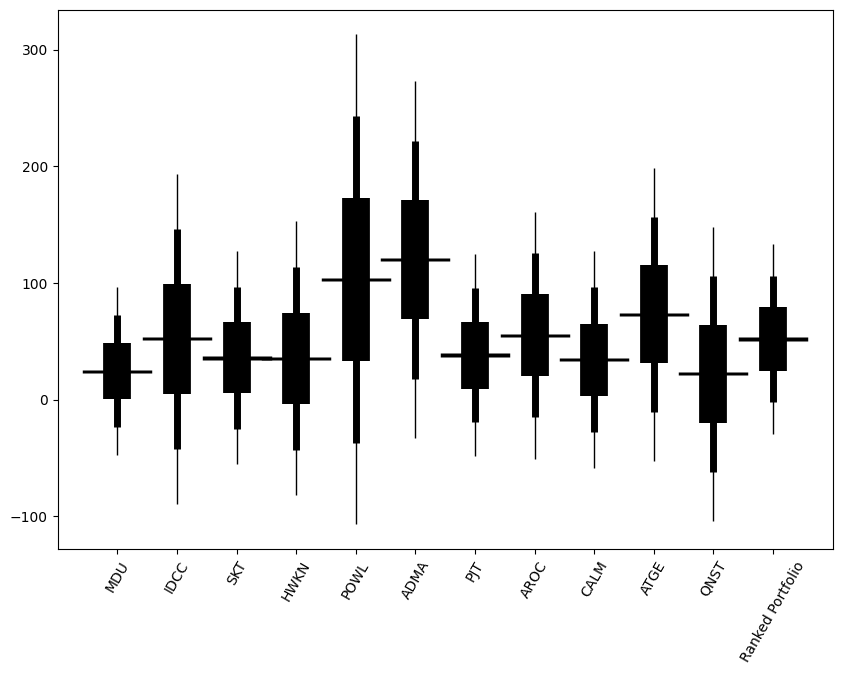

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

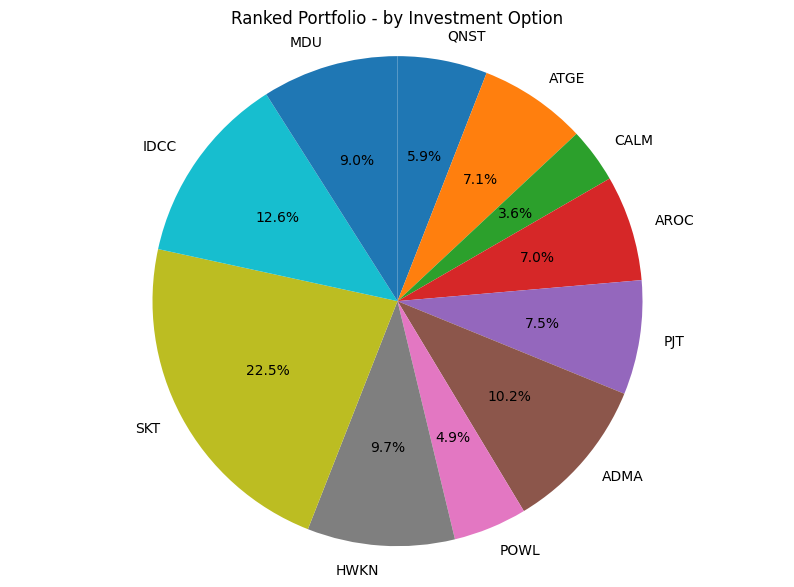

QNST   0.06
ATGE   0.07
CALM   0.04
AROC   0.07
PJT    0.08
ADMA   0.10
POWL   0.05
HWKN   0.10
SKT    0.22
IDCC   0.13
MDU    0.09



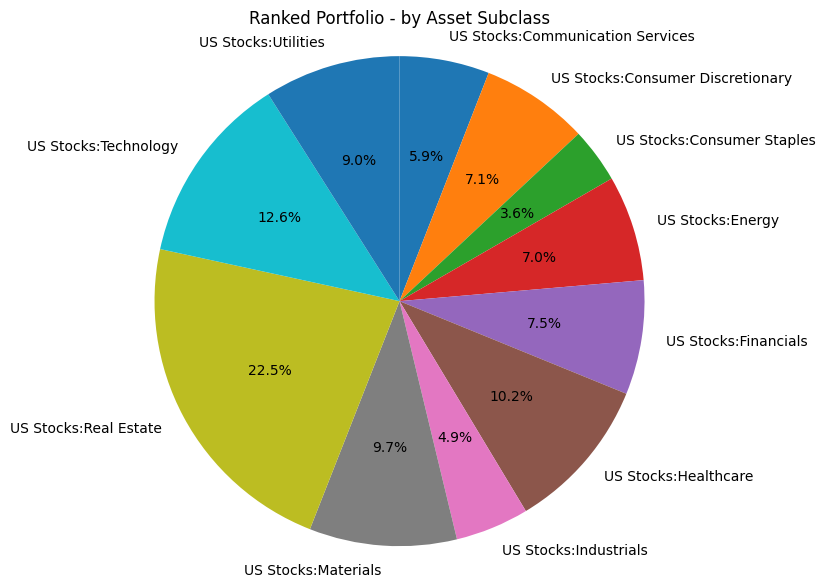

US Stocks:Communication Services   0.06
US Stocks:Consumer Discretionary   0.07
US Stocks:Consumer Staples         0.04
US Stocks:Energy                   0.07
US Stocks:Financials               0.08
US Stocks:Healthcare               0.10
US Stocks:Industrials              0.05
US Stocks:Materials                0.10
US Stocks:Real Estate              0.22
US Stocks:Technology               0.13
US Stocks:Utilities                0.09



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option', 'Asset Subclass'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    MDU                            0.0900
    IDCC                           0.1259
    SKT                            0.2245
    HWKN                           0.0973
    POWL                           0.0485
    ADMA                           0.1021
    PJT                            0.0754
    AROC                           0.0697
    CALM                           0.0362
    ATGE                           0.0711
    QNST                           0.0593


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = False

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).